In [95]:
import pandas as pd
import numpy as np
import sidetable
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,8)


Cargamos los datos con el csv

In [35]:
df = pd.read_csv("data/netflix_originals_limpio.csv", index_col = 0)
df.head(2)

,titles,years,genres,imdb,runtime,description,stars,number_of_votes,type,original_plataform
0,Zumbo's Just Desserts,2016,Reality-TV,6.9,52,Amateur Australian chefs compete to impress pa...,"Gigi Falanga, Rachel Khoo, Adriano Zumbo",1779,TV Show,Netflix
1,Zona Rosa,2019,Comedy,6.0,0,Add a Plot,"Ray Contreras, Pablo Morán, Manu Nna, Ana Juli...",33,TV Show,Netflix


Pero problemita... los datos que tenían formatos especiales no se han conservado.

In [36]:
df.dtypes

titles                 object
years                   int64
genres                 object
imdb                  float64
runtime                 int64
description            object
stars                  object
number_of_votes         int64
type                   object
original_plataform     object
dtype: object

Para evitar esto, podemos usar el pickle: 

In [37]:
df2 = pd.read_pickle("data/netflix_originals_limpio.pkl")
df2.head()

,titles,years,genres,imdb,runtime,description,stars,number_of_votes,type,original_plataform
0,Zumbo's Just Desserts,2016,Reality-TV,6.9,52,Amateur Australian chefs compete to impress pa...,"Gigi Falanga, Rachel Khoo, Adriano Zumbo",1779,TV Show,Netflix
1,Zona Rosa,2019,Comedy,6.0,0,Add a Plot,"Ray Contreras, Pablo Morán, Manu Nna, Ana Juli...",33,TV Show,Netflix
2,Young Wallander,2020,"Crime, Drama, Mystery",6.7,0,Follow recently graduated police officer Kurt ...,"Adam Pålsson, Leanne Best, Richard Dillane, El...",5419,TV Show,Netflix
3,You vs. Wild,2019,"Adventure, Reality-TV",6.7,20,"In this interactive series, you'll make key de...",Bear Grylls,1977,TV Show,Netflix
4,You,2018,"Crime, Drama, Romance",7.8,45,"A dangerously charming, intensely obsessive yo...","Penn Badgley, Victoria Pedretti, Ambyr Childer...",134932,TV Show,Netflix


In [38]:
df2.dtypes

titles                  object
years                 category
genres                  object
imdb                   float64
runtime                  int64
description             object
stars                   object
number_of_votes          Int64
type                    object
original_plataform      object
dtype: object

`genres` Recordamos que tenia muchas etiquetas. Necesitamos hacer que esas etiquetas sean mas amigables.

In [52]:
generos = list(df2['genres'].unique())
generos[:5]

['Reality-TV',
 'Comedy',
 'Crime, Drama, Mystery',
 'Adventure, Reality-TV',
 'Crime, Drama, Romance']

Necesitamos obtener los géneros únicos.

In [43]:
nuevos_generos = []
for i in generos:
    nuevos_generos.append(i.split(","))

nuevos_generos =  [elemento for sublista in nuevos_generos for elemento in sublista]

In [59]:
genero = input("introduce genero ").capitalize() 

introduce genero comedy


In [62]:
#generamos un filtro para localizar el genero sobre el que queremos flitrar 
filtro = df[df["genres"].str.contains(genero)]
filtro.head(2)


,titles,years,genres,imdb,runtime,description,stars,number_of_votes,type,original_plataform
1,Zona Rosa,2019,Comedy,6.0,0,Add a Plot,"Ray Contreras, Pablo Morán, Manu Nna, Ana Juli...",33,TV Show,Netflix
9,World of Winx,2016,"Animation, Action, Comedy",6.8,30,The Winx travel all over the world searching f...,"Rebecca Soler, Alysha Deslorieux, Haven Pascha...",556,TV Show,Netflix


In [69]:
filtro.genres.value_counts()

Comedy                     317
Comedy, Drama               41
Documentary, Comedy         31
Comedy, Romance             24
Comedy, Drama, Romance      24
                          ... 
Comedy, Drama, Western       1
Comedy, Drama, Thriller      1
Biography, Comedy            1
Comedy, Drama, Horror        1
Comedy, Thriller             1
Name: genres, Length: 64, dtype: int64

In [77]:
filtro2  = filtro[filtro['genres'].map(filtro['genres'].value_counts()) > 10]
filtro2.head(2)

,titles,years,genres,imdb,runtime,description,stars,number_of_votes,type,original_plataform
1,Zona Rosa,2019,Comedy,6.0,0,Add a Plot,"Ray Contreras, Pablo Morán, Manu Nna, Ana Juli...",33,TV Show,Netflix
17,Wet Hot American Summer: Ten Years Later,2017,Comedy,6.9,30,The campers and counselors of Camp Firewood me...,"Nina Hellman, Marguerite Moreau, Zak Orth, Mic...",7049,TV Show,Netflix


Ahora la cantidad de datos es mucho mas amigable para hacer una visualizacion 

In [78]:
filtro2["genres"].value_counts()

Comedy                          317
Comedy, Drama                    41
Documentary, Comedy              31
Comedy, Drama, Romance           24
Comedy, Romance                  24
Animation, Adventure, Comedy     21
Action, Adventure, Comedy        14
Comedy, Crime, Drama             11
Name: genres, dtype: int64

Agrupamos los valores por genero para analiozar las diferencias en su duracion.

In [82]:
df_graf = filtro2.groupby("genres")["runtime"].agg("mean").reset_index()
df_graf

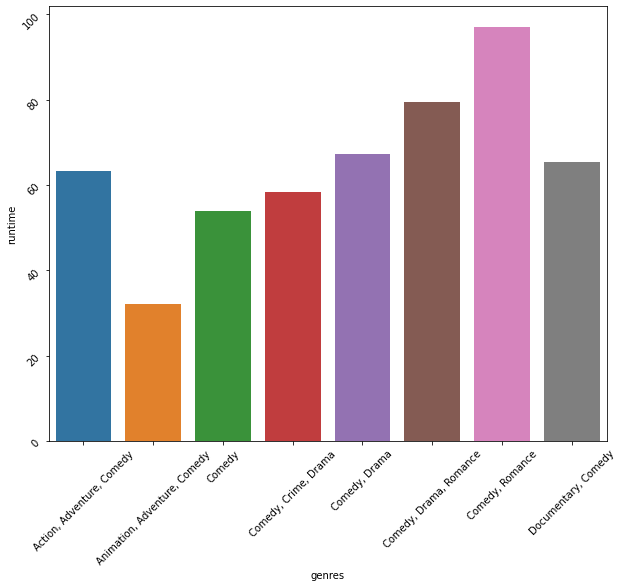

In [98]:

fig = sns.barplot(x = "genres", y = "runtime", data =df_graf)
fig.tick_params(labelrotation=45)
plt.show();